--- Visualizing Node2Vec + KMeans Communities (Color) ---


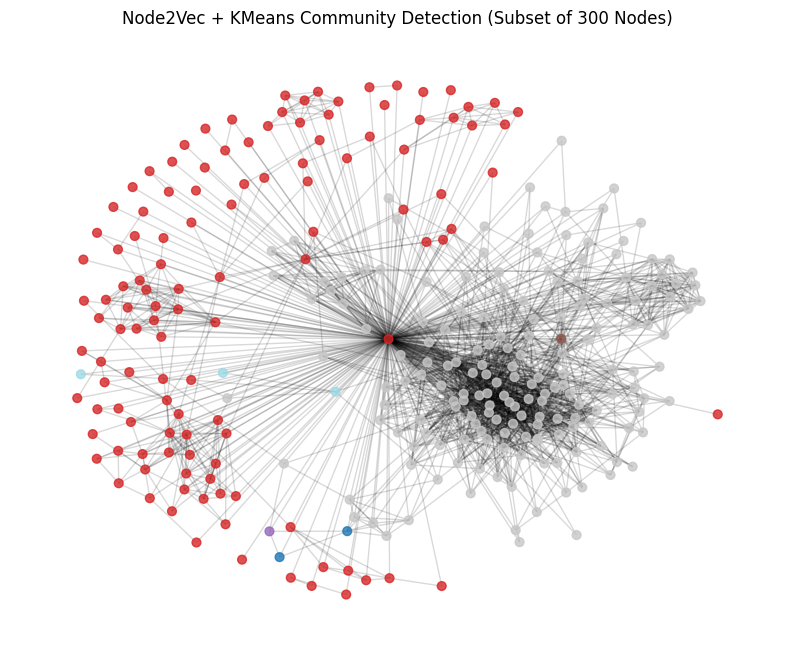

In [1]:
# --- File: visualization.ipynb ---

import sys
import os
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Set the path (use your absolute path if the relative path fails)
# ABSOLUTE_SRC_PATH = "C:/Users/hari2/Documents/DM/src" 
sys.path.append("../src/")


# --- 1. Load All Required Data ---

# 1. Load the cleaned graph
fb_file = "../data/processed/facebook_cleaned.edgelist"
G_fb = nx.read_edgelist(fb_file, nodetype=int)

# 2. Load Node2Vec + KMeans partition
df_n2v_communities = pd.read_csv("../results/node2vec_kmeans_communities.csv")
n2v_partition_map = df_n2v_communities.set_index('node')['community'].to_dict()

# 3. Load Influence Scores
df_influence = pd.read_csv("../results/influence_scores.csv")

# Now, set the first column (index 0) as the index, regardless of its header name
# The first column usually contains the node IDs.
df_influence = df_influence.set_index(df_influence.columns[0])

# Rename the index to 'node' for clarity (optional, but good practice)
df_influence.index.name = 'node' 


# --- 2. Visualization of Node2Vec + KMeans Communities ---

print("--- Visualizing Node2Vec + KMeans Communities (Color) ---")

# Use a manageable subset of nodes for clarity in the visual plot
NUM_NODES_TO_VISUALIZE = 300 
nodes_subset = [n for n in G_fb.nodes() if n in n2v_partition_map][:NUM_NODES_TO_VISUALIZE]
G_sub = G_fb.subgraph(nodes_subset)

# Get the community assignments for the subset
communities = [n2v_partition_map[n] for n in G_sub.nodes()]

pos = nx.spring_layout(G_sub, seed=42)

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(
    G_sub, pos, 
    node_size=40, 
    node_color=communities, 
    cmap=plt.cm.tab20, 
    alpha=0.8
)
nx.draw_networkx_edges(G_sub, pos, alpha=0.15)
plt.title(f"Node2Vec + KMeans Community Detection (Subset of {len(G_sub.nodes())} Nodes)")
plt.axis('off')
plt.show()

# You can save this plot using: plt.savefig("../reports/n2v_community_viz.png", dpi=300)

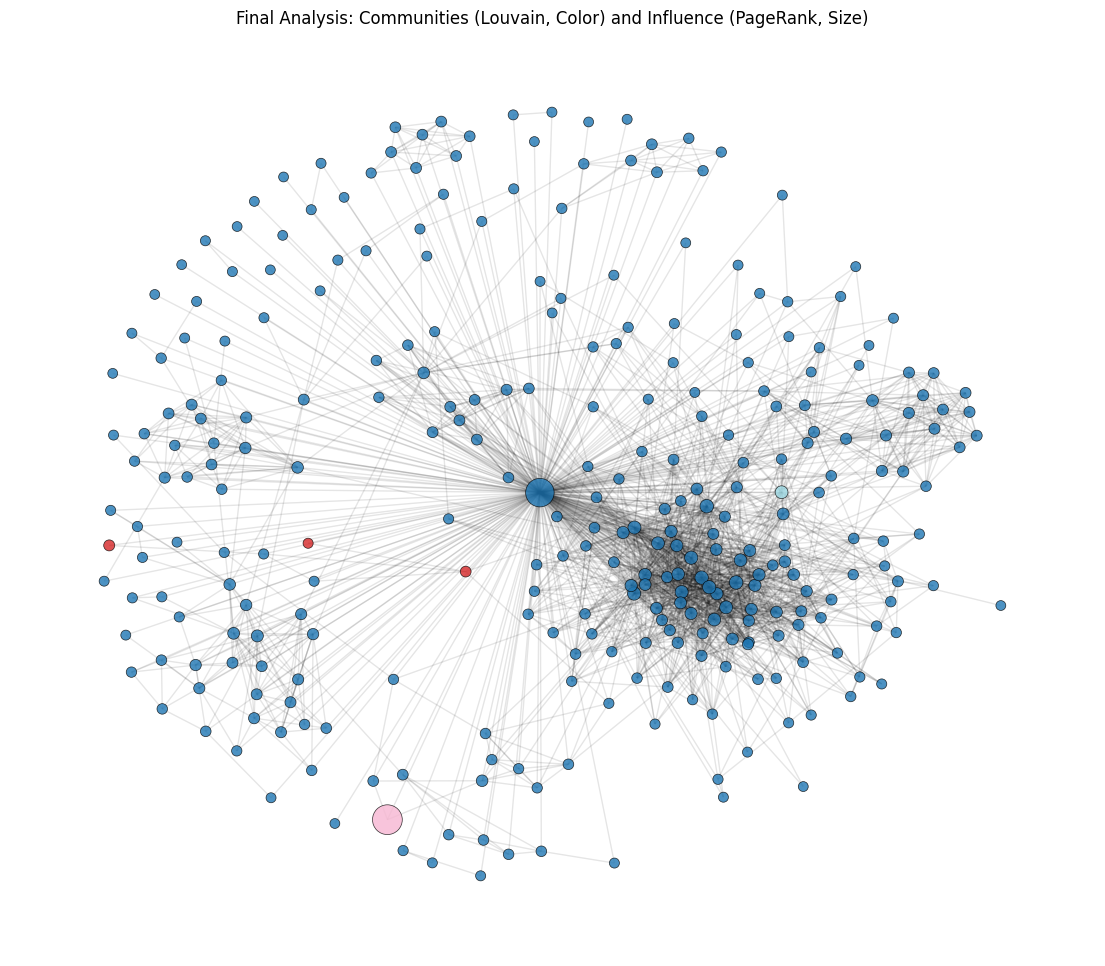

In [3]:
# --- Cell 2: Combine Louvain (Color) and PageRank (Size) ---

# 1. Load Louvain Partition (Assuming it has the highest modularity)
df_louvain_communities = pd.read_csv("../data/facebook_communities.csv")

louvain_partition_map = df_louvain_communities.set_index('node')['community'].to_dict()

# 2. Get PageRank Scores
pr_scores = df_influence['PageRank']

# 3. Prepare Node Sizes based on PageRank
# Scale PageRank scores to node sizes between 50 and 500 for visual effect
min_pr = pr_scores.min()
max_pr = pr_scores.max()
node_sizes = 50 + 450 * ((pr_scores - min_pr) / (max_pr - min_pr))


# 4. Prepare Data for Subset Visualization (Same subset of nodes)
G_sub_final = G_fb.subgraph(nodes_subset) 

# Get colors and sizes for the nodes in the subset
communities_final = [louvain_partition_map.get(n, -1) for n in G_sub_final.nodes()]
sizes_final = [node_sizes.get(n, 50) for n in G_sub_final.nodes()] 


# --- 5. Draw the Final Combined Plot ---

plt.figure(figsize=(14, 12))
pos = nx.spring_layout(G_sub_final, seed=42)

nx.draw_networkx_nodes(
    G_sub_final, pos, 
    node_size=sizes_final,           # Sizing based on PageRank influence
    node_color=communities_final,    # Coloring based on Louvain communities
    cmap=plt.cm.tab20, 
    alpha=0.8,
    linewidths=0.5,
    edgecolors='black'
)
nx.draw_networkx_edges(G_sub_final, pos, alpha=0.1)

plt.title(f"Final Analysis: Communities (Louvain, Color) and Influence (PageRank, Size)")
plt.axis('off')
plt.show()

# Save the combined final plot
# plt.savefig("../reports/final_combined_network_viz.png", dpi=300)